
#### Análise Temporal e Tendências

1. Tendência de Crescimento no Consumo de Energia:
- Analisar se há uma tendência de aumento no consumo de energia nos países da América do Sul ao longo dos últimos anos.
- Criar um gráfico de linha mostrando o crescimento do consumo de energia ao longo das décadas (por exemplo, 1990 a 2020).
- Identificar os países que tiveram o maior crescimento percentual no consumo de energia.

#### Gráficos e Visualizações

1. Distribuição de Consumo de Energia entre Países:
- Criar um histograma mostrando a distribuição do consumo total de energia entre os países da América do Sul.
2. Análise de Outliers:
- Identificar e visualizar países que possuem valores extremos no consumo de energia (outliers).

#### Análise Final

- Resumir as principais descobertas do estudo, como o país com o maior consumo de energia, a proporção de energia renovável usada na América do Sul e as tendências de crescimento.

2.1 Exploração de Dados
2.2 Limpeza de Dados
2.3 Análise Exploratória (qualidade dos vinho, nível de acidez e etc.)
2.4 Visualizações (Gráficos)

#### Importando bibliotecas e DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('owid-energy-data.csv')


In [201]:
import numpy as np

#### 2.1 - Exploração de Dados

##### Filtra os países da América do Sul

In [5]:
southAmerica = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
df = df[df['country'].isin(southAmerica) & (df['year'] > 2000)].reset_index(drop=True)
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Argentina,2001,ARG,37480492.0,5.148673e+11,NaN,NaN,NaN,NaN,9.605,0.36,0.399,NaN,302.086,-18.047,-1.356,164.268,6.157,36.286,1.36,-28.185,-0.480,32.603,1.222,1.509,0.902,91.89,90.140,15.076,-2.326,-16.253,18210.119,1.326,-6.980,-41.562,1229.706,46.09,14777.170,553.856,51.132,81.148,-6.384,-20.617,302.350,1154.200,43.26,8066.870,-0.722,-2.626,9636.653,361.186,47.992,44.299,27.23,28.014,22.968,107.465,975.974,36.580,2867.219,40.581,15.745,25.242,25.309,128.669,1175.278,44.050,3432.950,48.868,18.852,1.75,1.904,14.279,2.373,19.900,188.365,7.06,530.942,7.832,2.916,-7.394,-19.589,245.349,39.220,1.47,6546.032,6.244,30.025,13630.991,510.896,1.631,35.947,1.159,0.363,NaN,-5.966,-0.074,9.685,NaN,30.916,0.403,NaN,0.170,2404.984,682.524,27.578,22.937,108.769,986.913,36.990,2902.009,41.036,15.936,19.444,0.000,0.000,0.000,0.000,0.003,0.000,0.000,42.013,0.042,0.145,1.334,0.050,3.869,0.055,0.021
1,Argentina,2002,ARG,37885024.0,4.605585e+11,NaN,NaN,NaN,NaN,13.990,0.53,0.627,NaN,294.834,-25.509,-1.571,121.058,4.586,21.380,0.81,-75.269,-0.920,7.977,0.302,0.958,0.701,90.51,84.590,14.736,-4.110,-28.051,17275.256,1.421,-3.977,-22.025,1118.912,42.39,14038.020,531.831,50.112,81.261,-2.638,-7.975,294.376,1074.567,40.71,7

##### Exibe as dimensões do DataFrame

In [8]:
df.shape

(275, 129)

##### Exibe o resumo estatístico do DataFrame

In [11]:
df.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,275.000000,2.750000e+02,2.200000e+02,88.000000,95.000000,97.000000,97.000000,250.000000,250.000000,250.000000,97.000000,273.000000,160.000000,161.000000,161.000000,161.000000,273.000000,273.000000,117.000000,213.000000,213.000000,213.000000,273.000000,161.000000,273.000000,274.000000,161.000000,266.000000,266.000000,266.000000,217.000000,161.000000,161.000000,273.000000,273.000000,161.000000,161.000000,273.000000,161.000000,161.000000,161.000000,161.000000,273.000000,273.000000,161.000000,170.000000,234.000000,234.000000,234.000000,273.000000,161.000000,273.000000,161.000000,161.000000,161.000000,274.000000,274.000000,161.000000,274.000000,161.000000,161.000000,161.000000,161.000000,274.000000,274.000000,161.000000,274.000000,161.000000,273.000000,273.000000,46.000000,188.000000,189.000000,275.000000,275.000000,189.000000,274.000000,161.000000,161.000000,161.000000,161.000000,273.000000,273.000000,161.000000,190.000000,239.000000,239.00000,239.000000,273.000000,161.000000,161.000000,274.000000,227.000000,141.000000,161.000000,274.000000,227.000000,161.000000,274.000000,227.000000,161.000000,274.000000,266.000000,161.000000,161.000000,161.000000,274.000000,274.000000,161.000000,274.000000,161.000000,98.00000

##### Exibe uma visão geral do DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 277.3+ KB


##### Conta a quantidade de valores nulos por coluna

In [17]:
df.isnull().sum().sort_values(ascending = False)

nuclear_cons_change_pct    229
biofuel_cons_change_pct    187
biofuel_cons_change_twh    180
biofuel_cons_per_capita    178
biofuel_consumption        178
                          ... 
year                         0
population                   0
nuclear_electricity          0
nuclear_elec_per_capita      0
country                      0
Length: 129, dtype: int64

##### Calcula a porcentagem de valores nulos em cada coluna

In [20]:
df.isna().mean() * 100


country                    0.000000
year                       0.000000
iso_code                   0.000000
population                 0.000000
gdp                       20.000000
                            ...    
wind_elec_per_capita       0.363636
wind_electricity           0.363636
wind_energy_per_capita    41.454545
wind_share_elec            0.363636
wind_share_energy         41.454545
Length: 129, dtype: float64

##### Confere se existem valores duplicados

In [23]:
df.duplicated().sum()

0

#### Conferindo a existência de outliers

#### Utilizando o método Z-Score

In [27]:
from scipy import stats

z_scores = df.select_dtypes(include=['number']).apply(stats.zscore)

outliers = df[(z_scores > 3) | (z_scores < -3)].dropna(how='all')

print(outliers)


   country  year iso_code   population  gdp  biofuel_cons_change_pct  \
0      NaN   NaN      NaN          NaN  NaN                      NaN   
2      NaN   NaN      NaN          NaN  NaN                      NaN   
3      NaN   NaN      NaN          NaN  NaN                      NaN   
5      NaN   NaN      NaN          NaN  NaN                      NaN   
6      NaN   NaN      NaN          NaN  NaN                      NaN   
7      NaN   NaN      NaN          NaN  NaN                      NaN   
8      NaN   NaN      NaN          NaN  NaN                      NaN   
15     NaN   NaN      NaN          NaN  NaN                      NaN   
18     NaN   NaN      NaN          NaN  NaN                      NaN   
19     NaN   NaN      NaN          NaN  NaN                      NaN   
20     NaN   NaN      NaN          NaN  NaN                      NaN   
22     NaN   NaN      NaN          NaN  NaN                      NaN   
52     NaN   NaN      NaN  190779456.0  NaN                     

##### Identificou a população brasileira como outlier kkkkk

#### Utilizando o método IQR

In [31]:
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar os outliers
    outliersiqr = df[((df < lower_bound) | (df > upper_bound))]
    
    # Remover linhas onde todos os valores são NaN (ou seja, sem outliers)
    outliersiqr = outliersiqr.dropna(how='all')
    
    return outliersiqr

# Aplicar a função para colunas numéricas
outliersiqr = iqr_outliers(df.select_dtypes(include=['number']))

print(outliersiqr)


     year  population  gdp  biofuel_cons_change_pct  biofuel_cons_change_twh  \
0     NaN         NaN  NaN                      NaN                      NaN   
1     NaN         NaN  NaN                      NaN                      NaN   
2     NaN         NaN  NaN                      NaN                      NaN   
3     NaN         NaN  NaN                      NaN                      NaN   
4     NaN         NaN  NaN                      NaN                      NaN   
..    ...         ...  ...                      ...                      ...   
270   NaN         NaN  NaN                      NaN                      NaN   
271   NaN         NaN  NaN                      NaN                      NaN   
272   NaN         NaN  NaN                      NaN                      NaN   
273   NaN         NaN  NaN                      NaN                      NaN   
274   NaN         NaN  NaN                      NaN                      NaN   

     biofuel_cons_per_capita  biofuel_c

#### Exploração Inicial

In [34]:
dfconspt = df[[
 'country',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'electricity_demand',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
  'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
  'gas_energy_per_capita',
 'gas_share_energy',
 'greenhouse_gas_emissions',
 'hydro_cons_change_pct',
 'hydro_cons_change_twh',
 'hydro_consumption',
 'hydro_energy_per_capita',
 'hydro_share_elec',
 'hydro_share_energy',
 'low_carbon_cons_change_pct',
 'low_carbon_cons_change_twh',
 'low_carbon_consumption',
 'low_carbon_energy_per_capita',
 'low_carbon_share_energy',
 'nuclear_cons_change_pct',
 'nuclear_cons_change_twh',
 'nuclear_consumption',
 'nuclear_energy_per_capita',
 'nuclear_share_energy',
 'oil_cons_change_pct',
 'oil_cons_change_twh',
 'oil_consumption',
 'oil_energy_per_capita',
 'oil_share_energy',
 'other_renewable_consumption',
 'other_renewables_cons_change_pct',
 'other_renewables_cons_change_twh',
 'other_renewables_elec_per_capita',
 'other_renewables_elec_per_capita_exc_biofuel',
 'other_renewables_energy_per_capita',
 'other_renewables_share_energy',
 'primary_energy_consumption',
 'renewables_cons_change_pct',
 'renewables_cons_change_twh',
 'renewables_consumption',
 'renewables_energy_per_capita',
 'renewables_share_elec',
 'renewables_share_energy',
 'solar_cons_change_pct',
 'solar_cons_change_twh',
 'solar_consumption',
 'solar_energy_per_capita',
 'solar_share_energy',
 'wind_cons_change_pct',
 'wind_cons_change_twh',
 'wind_consumption',
 'wind_energy_per_capita',
 'wind_share_elec',
 'wind_share_energy']]

#### Exibe um resumo estatístico das variáveis relacionadas ao consumo de energia (como consumo de eletricidade, consumo de fontes renováveis, etc.).

In [37]:
dfconspt.describe()


,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,electricity_demand,fossil_cons_change_pct,fossil_cons_change_twh,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_energy_per_capita,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,low_carbon_share_energy,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_energy_per_capita,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_energy_per_capita,oil_share_energy,other_renewable_consumption,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_energy,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_energy_per_capita,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,88.000000,95.000000,97.000000,97.000000,160.000000,161.000000,161.000000,161.000000,161.000000,266.000000,266.000000,266.000000,217.000000,273.000000,161.000000,161.000000,161.000000,161.000000,273.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,273.000000,161.000000,161.000000,161.000000,161.000000,274.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,46.000000,188.000000,189.000000,189.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,141.000000,161.000000,274.000000,227.000000,161.000000,161.000000,266.000000,161.000000,161.000000,161.000000,161.000000,274.000000,161.000000,98.000000,149.000000,150.000000,150.000000,150.000000,136.000000,161.000000,161.000000,161.000000,274.000000,161.000000
mean,33.025432,2.262926,287.384423,43.544010,39.942719,0.238205,845.639385,42.553441,5.113826,2.221711,9.888579,16283.316752,1.429018,85.971941,2.347366,8.135938,12622.699366,583.786975,40.779260,73.201056,5.619168,3.034969,179.194683,4391.605416,22.170360,17.580403,2.425932,2.063739,227.451429,3574.049174,53.929569,22.820994,3.870211,7.918075,296.134807,4277.834814,26.798938,4.745348,0.126755,6.961862,80.025508,0.494311,2.258584,4.862851,362.038851,7385.454627,45.916857,19.858901,30.102858,1.144168,82.612869,0.439392,241.585404,1.357783,554.631744,3.934056,7.770081,287.962193,4183.891857,58.547361,26.304646,197.167245,1.310403,3.700540,83.841513,0.385187,350.376684,1.976149,10.969484,116.999373,1.854124,0.617379
std,145.489723,9.005921,346.650259,76.696894,318.093279,8.171085,1209.157934,57.746336,5.488381,6.813589,40.252138,7311.898564,0.717282,152.568223,7.392400,46.976355,6709.917088,533.655664,27.311911,9.450202,20.972759,21.611929,158.032317,4242.464656,15.340299,22.932389,9.958804,24.767762,329.144555,1849.514695,27.081860,8.233205,8.338228,28.837263,469.884163,2096.389251,9.450200,24.285287,2.356274,13.187553,159.316423,0.851143,9.082750,28.899929,390.922483,3220.515435,12.638408,44.086379,259.839030,3.818512,164.547492,2.715110,344.690548,1.583169,864.677036,8.651190,29.453427,458.078093,2108.465233,27.535307,9.577501,734.501471,5.710383,14.440576,314.695344,1.271222,2203.536470,6.224440,36.822208,265.177580,5.731172,1.310109
min,-49.350000,-19.942000,0.000000,0.000000,-100.000000,-35.247000,0.000000,0.000000,0.000000,-19.652000,-14

#### Limpeza de dados

###### Não sei determinar o melhor método de substituição dos valores nulos, então vou trocar tudo por zeros

In [41]:
df.fillna(0, inplace=True)

In [43]:
df.isnull().sum().sort_values(ascending = False)

country                                    0
low_carbon_elec_per_capita                 0
other_renewables_cons_change_pct           0
other_renewable_exc_biofuel_electricity    0
other_renewable_electricity                0
                                          ..
fossil_fuel_consumption                    0
fossil_energy_per_capita                   0
fossil_electricity                         0
fossil_elec_per_capita                     0
wind_share_energy                          0
Length: 129, dtype: int64

###### Não existem duplicatas 

#### Análise Exploratória

### Análise por Tipo de Energia:
 ##### Para cada país da América do Sul, analisar o consumo de energia elétrica (ou outra fonte de interesse) ao longo dos anos.


###### Filtra as colunas de consumo para cada tipo de matriz energética

In [90]:
dftypes = df[['country',
 'year',
 'biofuel_consumption',
 'coal_consumption',
 'fossil_fuel_consumption',
 'gas_consumption',
 'hydro_consumption',
 'low_carbon_consumption',
 'nuclear_consumption',
 'oil_consumption',
 'other_renewable_consumption',
 'primary_energy_consumption',
 'renewables_consumption',
 'solar_consumption',
 'wind_consumption',
]].copy()

#### Total do consumo de cada matriz energética nos países da América do Sul (de 2000 a 2022), em TWh

In [94]:
typestotal = dftypes.groupby('country').sum(numeric_only=True)
typestotal = typestotal.drop(columns = 'year')
typestotal

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
country,,,,,,,,,,,,,
Argentina,182.785,274.945,17574.896,9806.389,1971.531,2892.711,449.708,7493.560,100.236,20467.606,2443.004,28.087,160.361
Bolivia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1516.887,0.000,0.000,0.000
Brazil,3848.918,3905.925,39929.365,6616.016,23367.545,32407.261,866.084,29407.423,2586.039,72336.623,31541.177,313.701,1424.970
Chile,0.000,1414.335,7182.071,1445.532,1412.796,2082.193,0.000,4322.208,344.490,9264.266,2082.193,188.587,136.318
Colombia,125.772,1003.506,7403.493,2205.370,2932.334,3176.695,0.000,4194.616,109.173,10580.190,3176.695,6.257,3.162
Ecuador,1.964,5.135,2904.068,139.653,869.007,894.555,0.000,2759.285,20.027,3798.623,894.555,0.953,2.604
Guyana,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,170.378,0.000,0.000,0.000
Paraguay,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2725.936,0.000,0.000,0.000
Peru,64.330,212.333,3972.638,1240.822,1463.562,1619.018,0.000,2519.481,36.675,5591.655,1619.018,17.378,37.070


#### Demanda energética de cada país da América do Sul de 2000 a 2022, em TWh

In [57]:
dfelectricity = df[['country', 'year', 'electricity_demand']][df['electricity_demand'] > 0]
dfelectricity

,country,year,electricity_demand
0,Argentina,2001,91.89
1,Argentina,2002,90.51
2,Argentina,2003,97.10
3,Argentina,2004,103.73
4,Argentina,2005,109.63
...,...,...,...
269,Venezuela,2018,98.74
270,Venezuela,2019,84.31
271,Venezuela,2020,79.23
272,Venezuela,2021,82.57


#### Cria um gráfico de linhas mostrando o consumo de energia ao longo dos anos para cada país da América do Sul.


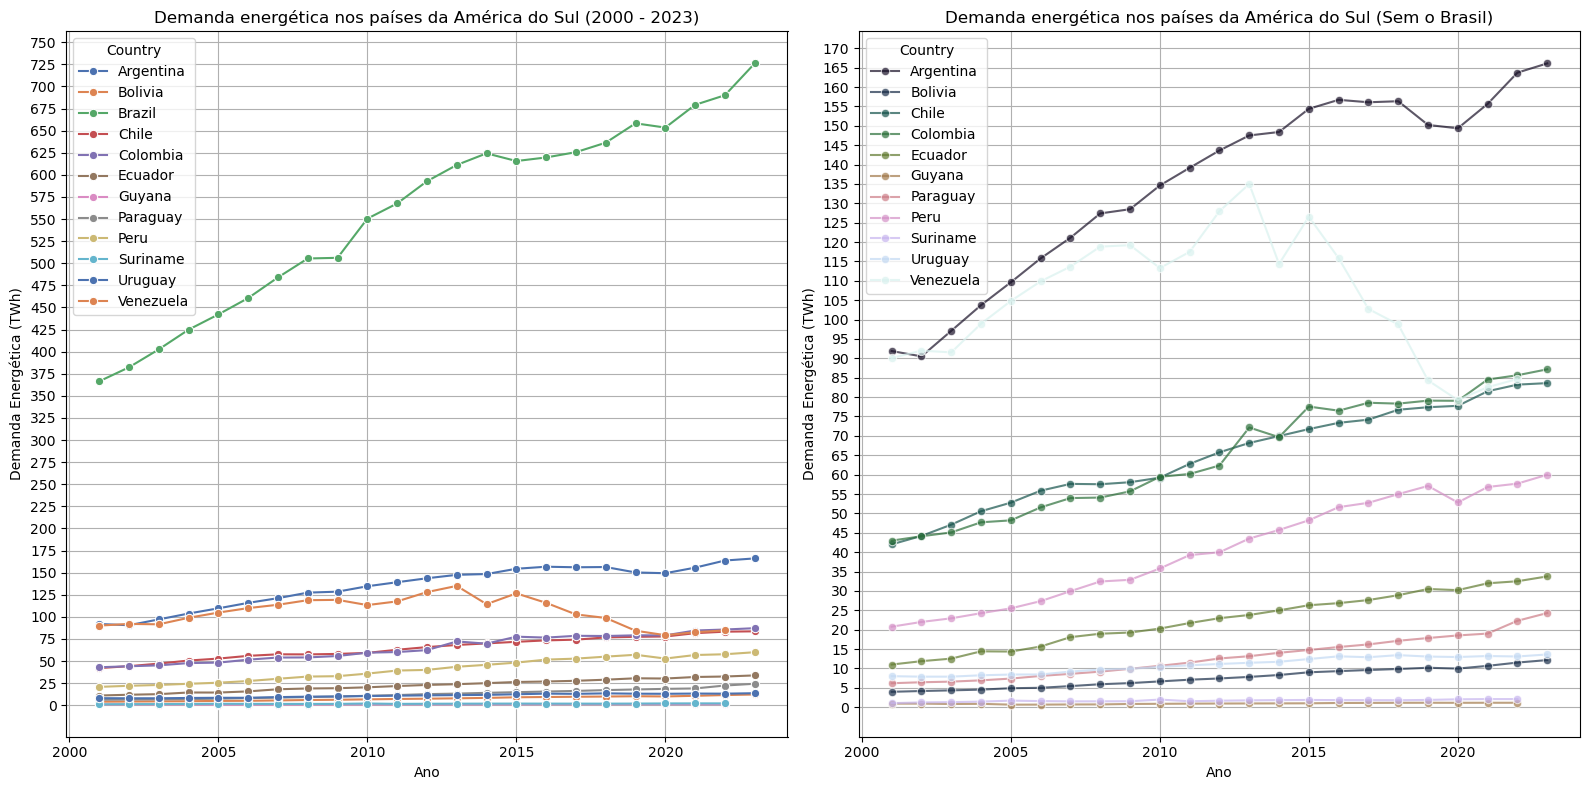

In [60]:
df_outros = dfelectricity[dfelectricity['country'] != 'Brazil']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))


sns.lineplot(data=dfelectricity, x='year', y='electricity_demand', hue='country', palette='deep', marker='o', ax=axes[0])
axes[0].set_title('Demanda energética nos países da América do Sul (2000 - 2023)')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Demanda Energética (TWh)')
axes[0].legend(title='Country')
axes[0].grid(True)

yticks = range(0, 751, 25)
axes[0].set_yticks(yticks)


sns.lineplot(data=df_outros, x='year', y='electricity_demand', hue='country', palette='cubehelix', marker='o', alpha=0.7, ax=axes[1])

yticks = range(0, 175, 5)
axes[1].set_yticks(yticks)

axes[1].set_title('Demanda energética nos países da América do Sul (Sem o Brasil)')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Demanda Energética (TWh)')
axes[1].legend(title='Country')
axes[1].grid(True)


plt.tight_layout()
plt.show()


##### Identificar os países com o maior e menor consumo total de energia ao longo dos anos.

##### Maior consumo, em TWh

In [64]:
dfelectricity.groupby('country')['electricity_demand'].sum().sort_values(ascending = False).head(5)



country
Brazil       12825.23
Argentina     3107.46
Venezuela     2321.65
Colombia      1493.52
Chile         1491.02
Name: electricity_demand, dtype: float64

##### Menor consumo, em TWh

In [67]:
dfelectricity.groupby('country')['electricity_demand'].sum().sort_values(ascending = True).head(5)


country
Guyana       20.59
Suriname     36.90
Bolivia     173.92
Uruguay     250.90
Paraguay    296.68
Name: electricity_demand, dtype: float64


#### Comparação de Fontes de Energia Renováveis vs. Não Renováveis


In [74]:
renovavel = typestotal[['biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption']].copy()

n_renovavel = typestotal[['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'oil_consumption', 'nuclear_consumption']].copy()


#### Consumo de energia proveniente de diferentes fontes energéticas renováveis, em KWh

In [76]:
renovavel

,biofuel_consumption,hydro_consumption,other_renewable_consumption,renewables_consumption,solar_consumption,wind_consumption
country,,,,,,
Argentina,182.785,1971.531,100.236,2443.004,28.087,160.361
Bolivia,0.000,0.000,0.000,0.000,0.000,0.000
Brazil,3848.918,23367.545,2586.039,31541.177,313.701,1424.970
Chile,0.000,1412.796,344.490,2082.193,188.587,136.318
Colombia,125.772,2932.334,109.173,3176.695,6.257,3.162
Ecuador,1.964,869.007,20.027,894.555,0.953,2.604
Guyana,0.000,0.000,0.000,0.000,0.000,0.000
Paraguay,0.000,0.000,0.000,0.000,0.000,0.000
Peru,64.330,1463.562,36.675,1619.018,17.378,37.070


#### Consumo de energia proveniente de fontes não renováveis, em TWh

In [78]:
n_renovavel

,coal_consumption,fossil_fuel_consumption,gas_consumption,oil_consumption,nuclear_consumption
country,,,,,
Argentina,274.945,17574.896,9806.389,7493.560,449.708
Bolivia,0.000,0.000,0.000,0.000,0.000
Brazil,3905.925,39929.365,6616.016,29407.423,866.084
Chile,1414.335,7182.071,1445.532,4322.208,0.000
Colombia,1003.506,7403.493,2205.370,4194.616,0.000
Ecuador,5.135,2904.068,139.653,2759.285,0.000
Guyana,0.000,0.000,0.000,0.000,0.000
Paraguay,0.000,0.000,0.000,0.000,0.000
Peru,212.333,3972.638,1240.822,2519.481,0.000


In [80]:
renovavel.loc[:, 'Total'] = renovavel.select_dtypes(include='number').sum(axis=1)


#### Total de energia renovável produzida entre 2000 e 2022

In [82]:
renovavel['Total']

country
Argentina     4886.004
Bolivia          0.000
Brazil       63082.350
Chile         4164.384
Colombia      6353.393
Ecuador       1789.110
Guyana           0.000
Paraguay         0.000
Peru          3238.033
Suriname         0.000
Uruguay          0.000
Venezuela     9210.539
Name: Total, dtype: float64

In [84]:
n_renovavel.loc[:, 'Total'] = n_renovavel.select_dtypes(include='number').sum(axis=1)


#### Total de energia não renovável produzida entre 2000 e 2022

In [88]:
n_renovavel['Total']

country
Argentina    35599.498
Bolivia          0.000
Brazil       80724.813
Chile        14364.146
Colombia     14806.985
Ecuador       5808.141
Guyana           0.000
Paraguay         0.000
Peru          7945.274
Suriname         0.000
Uruguay          0.000
Venezuela    30046.341
Name: Total, dtype: float64

In [144]:
n_renovavel_y = dftypes[['country','year','coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'oil_consumption', 'nuclear_consumption']].copy()
n_renovavel_y['Total'] = n_renovavel_y.drop(columns=['year']).select_dtypes(include='number').sum(axis=1)

In [138]:
renovavel_y = dftypes[['country','year', 'biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption']].copy()
renovavel_y['Total'] = renovavel_y.drop(columns=['year']).select_dtypes(include='number').sum(axis=1)


#### Variações da produção de energia renovável e não renovável nos países da América do Sul

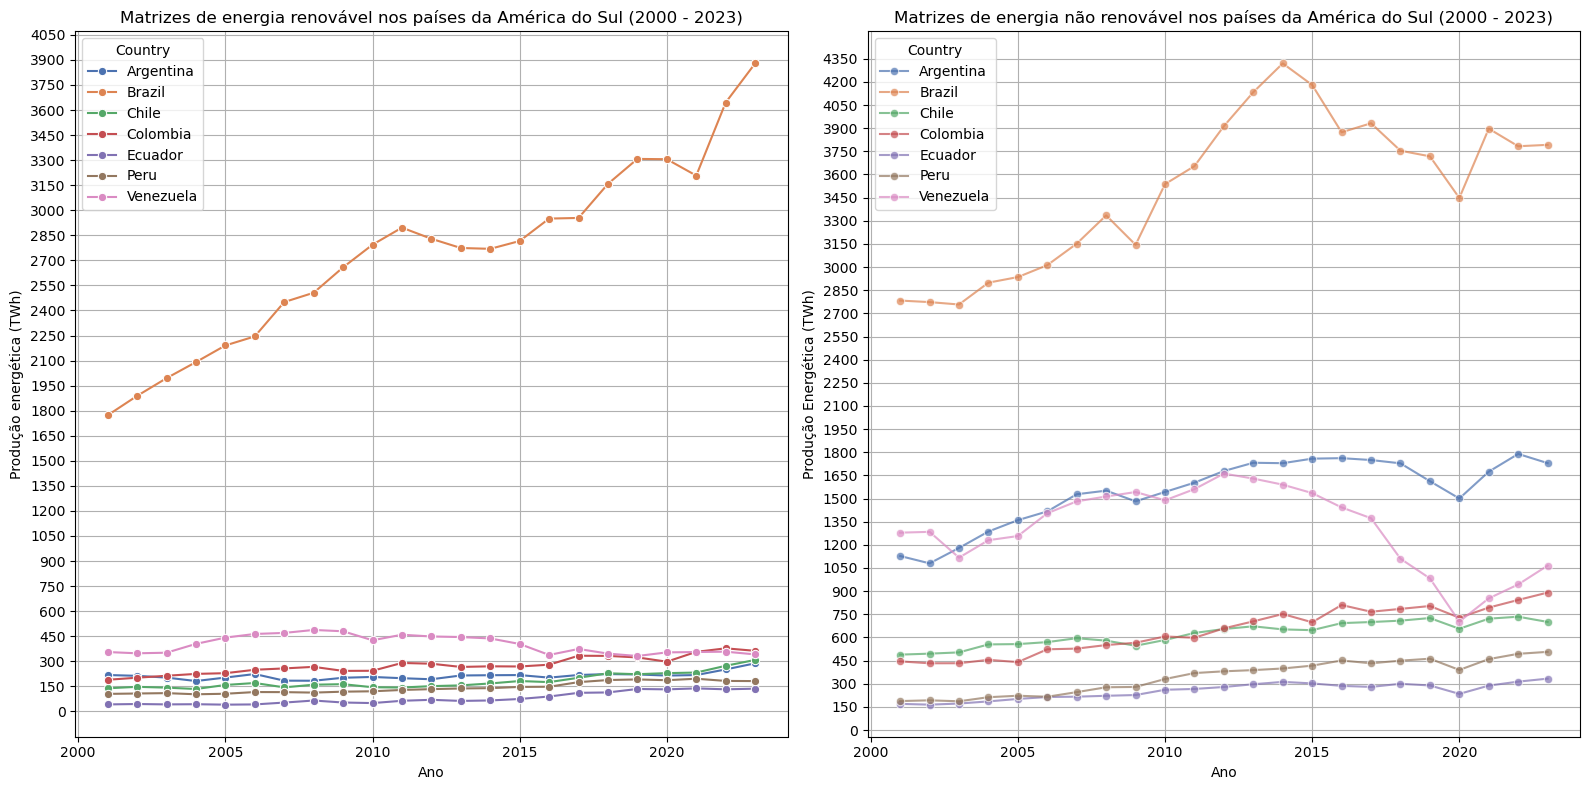

In [176]:
renovavel_y = renovavel_y[renovavel_y['Total'] > 0]
n_renovavel_y = n_renovavel_y[n_renovavel_y['Total'] > 0]



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))


sns.lineplot(data=renovavel_y, x='year', y='Total', hue='country', palette='deep', marker='o', ax=axes[0])
axes[0].set_title('Matrizes de energia renovável nos países da América do Sul (2000 - 2023)')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Produção energética (TWh)')
axes[0].legend(title='Country')
axes[0].grid(True)

yticks = range(0, 4200, 150)
axes[0].set_yticks(yticks)


sns.lineplot(data=n_renovavel_y, x='year', y='Total', hue='country', palette='deep', marker='o', alpha=0.7, ax=axes[1])

yticks = range(0, 4400, 150)
axes[1].set_yticks(yticks)

axes[1].set_title('Matrizes de energia não renovável nos países da América do Sul (2000 - 2023)')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Produção Energética (TWh)')
axes[1].legend(title='Country')
axes[1].grid(True)


plt.tight_layout()
plt.show()


#### Cálculo da média e do desvio padrão do consumo de cada tipo de energia por país.

In [192]:
media= dftypes.drop(columns=['year']).groupby('country').mean()
desvp = dftypes.drop(columns=['year']).groupby('country').std()

media

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
country,,,,,,,,,,,,,
Argentina,7.947174,11.954130,764.125913,426.364739,85.718739,125.770043,19.552522,325.806957,4.358087,889.895913,106.217565,1.221174,6.972217
Bolivia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.951609,0.000000,0.000000,0.000000
Brazil,167.344261,169.822826,1736.059348,287.652870,1015.980217,1409.011348,37.655826,1278.583609,112.436478,3145.070565,1371.355522,13.639174,61.955217
Chile,0.000000,61.492826,312.263957,62.849217,61.425913,90.530130,0.000000,187.922087,14.977826,402.794174,90.530130,8.199435,5.926870
Colombia,5.468348,43.630696,321.891000,95.885652,127.492783,138.117174,0.000000,182.374609,4.746652,460.008261,138.117174,0.272043,0.137478
Ecuador,0.085391,0.223261,126.263826,6.071870,37.782913,38.893696,0.000000,119.968913,0.870739,165.157522,38.893696,0.041435,0.113217
Guyana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.407739,0.000000,0.000000,0.000000
Paraguay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118.518957,0.000000,0.000000,0.000000
Peru,2.796957,9.231870,172.723391,53.948783,63.633130,70.392087,0.000000,109.542652,1.594565,243.115435,70.392087,0.755565,1.611739


In [194]:
desvp

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
country,,,,,,,,,,,,,
Argentina,7.133017,3.495670,107.924275,54.507289,14.410982,11.936585,2.892430,54.299423,1.673119,111.660131,11.328487,2.584449,12.822114
Bolivia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.416162,0.000000,0.000000,0.000000
Brazil,67.643246,21.130285,244.100713,91.237485,96.652709,274.899494,3.474893,141.664424,58.772656,482.797616,274.173099,32.256019,80.025508
Chile,0.000000,22.979848,38.952831,17.976377,7.431562,23.338910,0.000000,28.364084,7.528912,58.187440,23.338910,13.786237,8.067423
Colombia,3.977671,13.379511,74.542783,27.508458,19.558531,25.917196,0.000000,42.655985,2.952272,98.409229,25.917196,0.701259,0.107384
Ecuador,0.101984,0.257533,25.843715,1.982083,17.503392,18.167506,0.000000,24.362367,0.530447,40.519544,18.167506,0.048655,0.137675
Guyana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.840269,0.000000,0.000000,0.000000
Paraguay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.289657,0.000000,0.000000,0.000000
Peru,1.973230,1.393123,54.373514,33.396335,11.611644,16.466941,0.000000,22.203371,0.866087,69.395194,16.466941,0.998693,2.159981


#### Criar um gráfico de barras que mostre a proporção de uso de energia renovável em comparação com a energia não renovável para cada país da América do Sul.


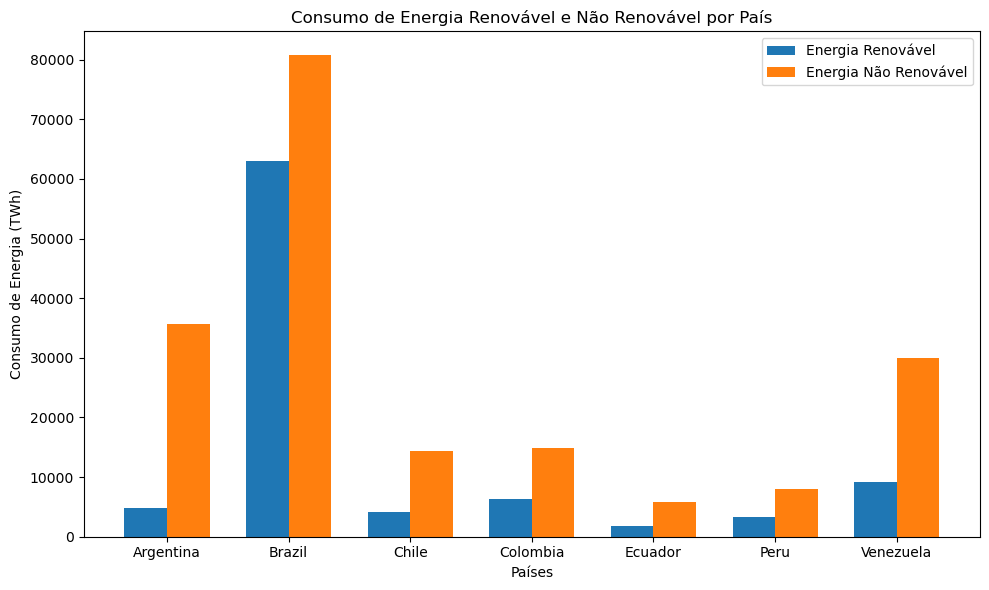

In [215]:
renovavel = renovavel[renovavel['Total'] > 0]
n_renovavel = n_renovavel[n_renovavel['Total'] > 0]

# Definir a largura das barras
bar_width = 0.35
index = np.arange(len(renovavel.index))  # Assumindo que ambas têm os mesmos países

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

# Barras de energia renovável
plt.bar(index, renovavel['Total'], bar_width, label='Energia Renovável')

# Barras de energia não renovável (deslocadas para a direita)
plt.bar(index + bar_width, n_renovavel['Total'], bar_width, label='Energia Não Renovável')

# Adicionar títulos e labels
plt.xlabel('Países')
plt.ylabel('Consumo de Energia (TWh)')
plt.title('Consumo de Energia Renovável e Não Renovável por País')

# Ajustar os ticks do eixo X
plt.xticks(index + bar_width / 2, renovavel.index)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

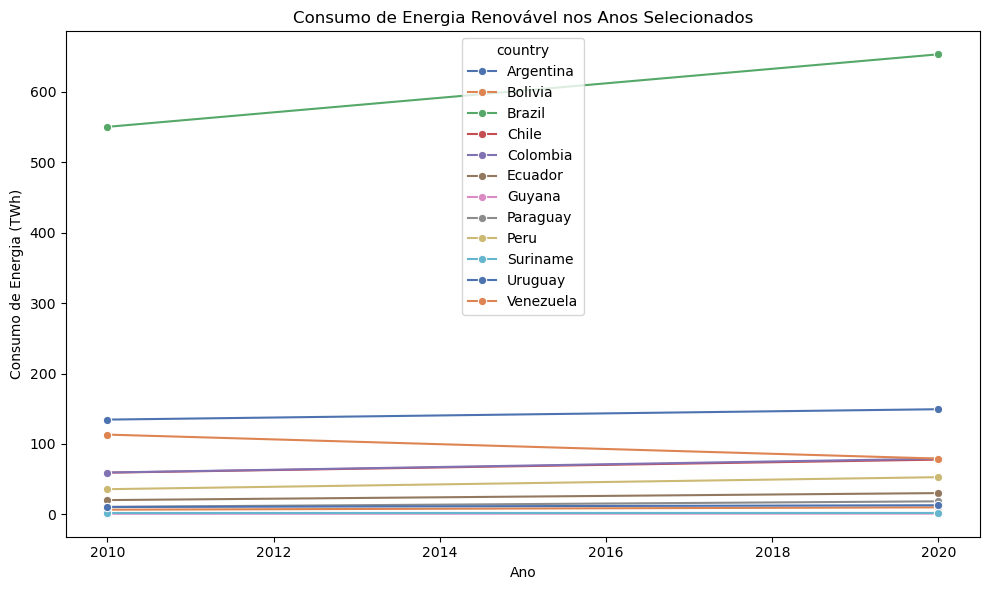

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar os anos desejados
anos_selecionados = [2000, 2010, 2020]  
df_filtrado = dfelectricity[dfelectricity['year'].isin(anos_selecionados)]

# Criar o gráfico com Seaborn, que suporta o parâmetro 'hue'
plt.figure(figsize=(10, 6))

# Plotando a energia renovável com hue para diferenciar os países
sns.lineplot(data=df_filtrado, x='year', y='electricity_demand', hue='country', palette='deep', marker='o')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia (TWh)')
plt.title('Consumo de Energia Renovável nos Anos Selecionados')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()
